# tf.data
- 4. 텐서플로에서 데이터 다루는 방법

In [1]:
import os       # 컴퓨터 로컬 환경을 파이썬에서 제어
from glob import glob   # 로컬 파일을 조회하여 사용하는 패키지

import tensorflow as tf
import numpy as np
from PIL import Image

import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(7777)
tf.random.set_seed(7777)

## Read a file


- 로컬 환경에 저장되어 있는 파일을 읽어 보겠습니다.

### cifar 데이터를 load하지 않고 로컬에서 읽어 온다. 

In [8]:
os.listdir('./datasets/cifar/train/')

['32270_deer.png',
 '21851_cat.png',
 '48309_deer.png',
 '33547_truck.png',
 '45202_automobile.png',
 '2789_bird.png',
 '24517_horse.png',
 '15193_frog.png',
 '10817_ship.png',
 '49897_ship.png',
 '42274_dog.png',
 '7873_dog.png',
 '42550_horse.png',
 '45066_cat.png',
 '44738_dog.png',
 '44071_deer.png',
 '20642_deer.png',
 '34900_horse.png',
 '4062_frog.png',
 '18251_deer.png',
 '39228_dog.png',
 '16978_ship.png',
 '22394_automobile.png',
 '25124_ship.png',
 '6917_bird.png',
 '248_frog.png',
 '10711_automobile.png',
 '35881_ship.png',
 '37937_automobile.png',
 '4835_cat.png',
 '2804_airplane.png',
 '44927_ship.png',
 '33527_horse.png',
 '18797_ship.png',
 '38262_automobile.png',
 '31839_horse.png',
 '15717_bird.png',
 '1620_bird.png',
 '42179_airplane.png',
 '31068_truck.png',
 '25866_frog.png',
 '43479_airplane.png',
 '26869_truck.png',
 '7832_automobile.png',
 '38801_bird.png',
 '38918_horse.png',
 '7827_automobile.png',
 '37516_ship.png',
 '35804_cat.png',
 '24696_cat.png',
 '11518

In [11]:
train_img = glob('./datasets/cifar/train/*.png')

In [12]:
train_img

['./datasets/cifar/train/32270_deer.png',
 './datasets/cifar/train/21851_cat.png',
 './datasets/cifar/train/48309_deer.png',
 './datasets/cifar/train/33547_truck.png',
 './datasets/cifar/train/45202_automobile.png',
 './datasets/cifar/train/2789_bird.png',
 './datasets/cifar/train/24517_horse.png',
 './datasets/cifar/train/15193_frog.png',
 './datasets/cifar/train/10817_ship.png',
 './datasets/cifar/train/49897_ship.png',
 './datasets/cifar/train/42274_dog.png',
 './datasets/cifar/train/7873_dog.png',
 './datasets/cifar/train/42550_horse.png',
 './datasets/cifar/train/45066_cat.png',
 './datasets/cifar/train/44738_dog.png',
 './datasets/cifar/train/44071_deer.png',
 './datasets/cifar/train/20642_deer.png',
 './datasets/cifar/train/34900_horse.png',
 './datasets/cifar/train/4062_frog.png',
 './datasets/cifar/train/18251_deer.png',
 './datasets/cifar/train/39228_dog.png',
 './datasets/cifar/train/16978_ship.png',
 './datasets/cifar/train/22394_automobile.png',
 './datasets/cifar/train/25

### TensorFlow 명령어로 Image 읽기


In [13]:
path = train_img[0]

In [14]:
path

'./datasets/cifar/train/32270_deer.png'

In [16]:
raw = tf.io.read_file('./datasets/cifar/train/32270_deer.png')

# png 파일이라 binary로 인코딩 되어있다.

In [18]:
img = tf.io.decode_image(raw)

# tensor가 나온다.

In [ ]:
img.shape, img.dtype
# 텐서를 불러오면 무조건 해야하는 것

(TensorShape([32, 32, 3]), tf.uint8)

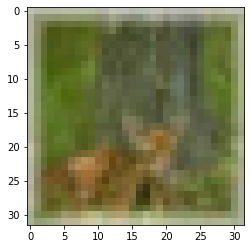

In [20]:
plt.imshow(img)
plt.show()

In [21]:
# 이 과정을 함수로 만들기
def read_image(path):
    raw = tf.io.read_file(path)
    img = tf.io.decode_image(raw)
    return img

In [ ]:
imgs = []
for path in train_img:
    imgs.append(read_image(path))

    # 데이터가 많아지면 메모리가 터질 것임

## 만약에, 이미지가 수백만 장 이라면?? 

In [22]:
train_img

['./datasets/cifar/train/32270_deer.png',
 './datasets/cifar/train/21851_cat.png',
 './datasets/cifar/train/48309_deer.png',
 './datasets/cifar/train/33547_truck.png',
 './datasets/cifar/train/45202_automobile.png',
 './datasets/cifar/train/2789_bird.png',
 './datasets/cifar/train/24517_horse.png',
 './datasets/cifar/train/15193_frog.png',
 './datasets/cifar/train/10817_ship.png',
 './datasets/cifar/train/49897_ship.png',
 './datasets/cifar/train/42274_dog.png',
 './datasets/cifar/train/7873_dog.png',
 './datasets/cifar/train/42550_horse.png',
 './datasets/cifar/train/45066_cat.png',
 './datasets/cifar/train/44738_dog.png',
 './datasets/cifar/train/44071_deer.png',
 './datasets/cifar/train/20642_deer.png',
 './datasets/cifar/train/34900_horse.png',
 './datasets/cifar/train/4062_frog.png',
 './datasets/cifar/train/18251_deer.png',
 './datasets/cifar/train/39228_dog.png',
 './datasets/cifar/train/16978_ship.png',
 './datasets/cifar/train/22394_automobile.png',
 './datasets/cifar/train/25

## 이럴 때 필요한게 tf.data API! 

 - 미리 이미지 데이터를 모두 불러오는게 아니라 그 때 그 떄 처리를 하는 것
 - 속도도 더 빨라요! 

In [24]:
dataset = tf.data.Dataset.from_tensor_slices(train_img)
                                    # tuple, list, tensor 형태

In [25]:
next(iter(dataset))

<tf.Tensor: shape=(), dtype=string, numpy=b'./datasets/cifar/train/32270_deer.png'>

In [26]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
dataset = dataset.map(read_image, num_parallel_calls=AUTOTUNE)
                                    # 몇개의 cpu, gpu를 사용할 것인지 지정하는 것

In [27]:
next(iter(dataset))

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[191, 194, 175],
        [182, 185, 165],
        [182, 186, 164],
        ...,
        [191, 194, 172],
        [188, 191, 171],
        [188, 191, 173]],

       [[175, 177, 156],
        [146, 149, 122],
        [145, 148, 117],
        ...,
        [151, 157, 119],
        [151, 157, 123],
        [166, 171, 143]],

       [[177, 177, 154],
        [137, 139, 106],
        [119, 122,  79],
        ...,
        [119, 128,  74],
        [137, 144,  99],
        [171, 177, 142]],

       ...,

       [[174, 180, 148],
        [134, 140,  91],
        [102, 109,  44],
        ...,
        [ 91, 104,  53],
        [134, 145, 103],
        [164, 170, 140]],

       [[163, 173, 140],
        [121, 134,  86],
        [113, 129,  67],
        ...,
        [134, 146, 101],
        [143, 153, 115],
        [167, 173, 144]],

       [[168, 176, 150],
        [145, 157, 123],
        [146, 162, 121],
        ...,
        [174, 185, 150]

In [28]:
dataset = dataset.batch(32)

In [29]:
next(iter(dataset))

<tf.Tensor: shape=(32, 32, 32, 3), dtype=uint8, numpy=
array([[[[191, 194, 175],
         [182, 185, 165],
         [182, 186, 164],
         ...,
         [191, 194, 172],
         [188, 191, 171],
         [188, 191, 173]],

        [[175, 177, 156],
         [146, 149, 122],
         [145, 148, 117],
         ...,
         [151, 157, 119],
         [151, 157, 123],
         [166, 171, 143]],

        [[177, 177, 154],
         [137, 139, 106],
         [119, 122,  79],
         ...,
         [119, 128,  74],
         [137, 144,  99],
         [171, 177, 142]],

        ...,

        [[174, 180, 148],
         [134, 140,  91],
         [102, 109,  44],
         ...,
         [ 91, 104,  53],
         [134, 145, 103],
         [164, 170, 140]],

        [[163, 173, 140],
         [121, 134,  86],
         [113, 129,  67],
         ...,
         [134, 146, 101],
         [143, 153, 115],
         [167, 173, 144]],

        [[168, 176, 150],
         [145, 157, 123],
         [146, 162,

In [32]:
# 텐서플로에서 병렬적으로 다음 것을 미리 읽어들어온다. 속도가 빨라진다.
# dataset = dataset.prefetch(1)
dataset = dataset.prefetch(AUTOTUNE)


In [33]:
next(iter(dataset))

<tf.Tensor: shape=(32, 32, 32, 3), dtype=uint8, numpy=
array([[[[191, 194, 175],
         [182, 185, 165],
         [182, 186, 164],
         ...,
         [191, 194, 172],
         [188, 191, 171],
         [188, 191, 173]],

        [[175, 177, 156],
         [146, 149, 122],
         [145, 148, 117],
         ...,
         [151, 157, 119],
         [151, 157, 123],
         [166, 171, 143]],

        [[177, 177, 154],
         [137, 139, 106],
         [119, 122,  79],
         ...,
         [119, 128,  74],
         [137, 144,  99],
         [171, 177, 142]],

        ...,

        [[174, 180, 148],
         [134, 140,  91],
         [102, 109,  44],
         ...,
         [ 91, 104,  53],
         [134, 145, 103],
         [164, 170, 140]],

        [[163, 173, 140],
         [121, 134,  86],
         [113, 129,  67],
         ...,
         [134, 146, 101],
         [143, 153, 115],
         [167, 173, 144]],

        [[168, 176, 150],
         [145, 157, 123],
         [146, 162,

In [34]:
dataset = dataset.shuffle(buffer_size=1)
                            # 얼마만큼 셔플링을 할 것인가

In [35]:
next(iter(dataset))

<tf.Tensor: shape=(32, 32, 32, 3), dtype=uint8, numpy=
array([[[[191, 194, 175],
         [182, 185, 165],
         [182, 186, 164],
         ...,
         [191, 194, 172],
         [188, 191, 171],
         [188, 191, 173]],

        [[175, 177, 156],
         [146, 149, 122],
         [145, 148, 117],
         ...,
         [151, 157, 119],
         [151, 157, 123],
         [166, 171, 143]],

        [[177, 177, 154],
         [137, 139, 106],
         [119, 122,  79],
         ...,
         [119, 128,  74],
         [137, 144,  99],
         [171, 177, 142]],

        ...,

        [[174, 180, 148],
         [134, 140,  91],
         [102, 109,  44],
         ...,
         [ 91, 104,  53],
         [134, 145, 103],
         [164, 170, 140]],

        [[163, 173, 140],
         [121, 134,  86],
         [113, 129,  67],
         ...,
         [134, 146, 101],
         [143, 153, 115],
         [167, 173, 144]],

        [[168, 176, 150],
         [145, 157, 123],
         [146, 162,

In [36]:
dataset = dataset.repeat()
                        # epoch 반복 횟수 ; 아무것도 안쓰면 무한히 진행함. // 숫자를 넣는 경우는 잘 없다.

In [37]:
next(iter(dataset))

<tf.Tensor: shape=(32, 32, 32, 3), dtype=uint8, numpy=
array([[[[191, 194, 175],
         [182, 185, 165],
         [182, 186, 164],
         ...,
         [191, 194, 172],
         [188, 191, 171],
         [188, 191, 173]],

        [[175, 177, 156],
         [146, 149, 122],
         [145, 148, 117],
         ...,
         [151, 157, 119],
         [151, 157, 123],
         [166, 171, 143]],

        [[177, 177, 154],
         [137, 139, 106],
         [119, 122,  79],
         ...,
         [119, 128,  74],
         [137, 144,  99],
         [171, 177, 142]],

        ...,

        [[174, 180, 148],
         [134, 140,  91],
         [102, 109,  44],
         ...,
         [ 91, 104,  53],
         [134, 145, 103],
         [164, 170, 140]],

        [[163, 173, 140],
         [121, 134,  86],
         [113, 129,  67],
         ...,
         [134, 146, 101],
         [143, 153, 115],
         [167, 173, 144]],

        [[168, 176, 150],
         [145, 157, 123],
         [146, 162,

In [39]:
# total

dataset = tf.data.Dataset.from_tensor_slices(train_img)
                                    # tuple, list, tensor 형태
AUTOTUNE = tf.data.experimental.AUTOTUNE
dataset = dataset.map(read_image, num_parallel_calls=AUTOTUNE)
dataset = dataset.batch(32)
dataset = dataset.prefetch(AUTOTUNE)
dataset = dataset.shuffle(buffer_size=1)
dataset = dataset.repeat()

next(iter(dataset))

<tf.Tensor: shape=(32, 32, 32, 3), dtype=uint8, numpy=
array([[[[191, 194, 175],
         [182, 185, 165],
         [182, 186, 164],
         ...,
         [191, 194, 172],
         [188, 191, 171],
         [188, 191, 173]],

        [[175, 177, 156],
         [146, 149, 122],
         [145, 148, 117],
         ...,
         [151, 157, 119],
         [151, 157, 123],
         [166, 171, 143]],

        [[177, 177, 154],
         [137, 139, 106],
         [119, 122,  79],
         ...,
         [119, 128,  74],
         [137, 144,  99],
         [171, 177, 142]],

        ...,

        [[174, 180, 148],
         [134, 140,  91],
         [102, 109,  44],
         ...,
         [ 91, 104,  53],
         [134, 145, 103],
         [164, 170, 140]],

        [[163, 173, 140],
         [121, 134,  86],
         [113, 129,  67],
         ...,
         [134, 146, 101],
         [143, 153, 115],
         [167, 173, 144]],

        [[168, 176, 150],
         [145, 157, 123],
         [146, 162,

#### Label도 같이 넘겨주기

In [44]:
train_img[0].split('/')[-1].split('.')[0].split('_')[-1]
# deer가 label 임

'deer'

In [53]:
# os.listdir('./datasets/cifar')
tf.io.read_file('./datasets/cifar/labels.txt').numpy().decode('ascii').strip().split('\n')

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [54]:
label_names = tf.io.read_file('./datasets/cifar/labels.txt').numpy().\
    decode('ascii').strip().split('\n')

In [55]:
label_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [56]:
def parse_label(path):
    name = path.split('/')[-1].split('.')[0].split('_')[-1]
    return name

In [57]:
parse_label(train_img[0])
# 학습에 사용하지 못한다. >> 이를 숫자로 바꿔줘야한다.

'deer'

In [59]:
label_names.index('deer')

4

In [60]:
# one hot encoding

In [64]:
def parse_label(path):
    name = path.split('/')[-1].split('.')[0].split('_')[-1]
    return np.array(name == np.array(label_names), dtype=np.float32)

In [63]:
np.array('deer' == np.array(label_names), dtype=np.float32)

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [65]:
parse_label(train_img[0])

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [68]:
train_y = np.array([parse_label(x) for x in train_img])

In [69]:
train_y[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [70]:
# dataset에 넘기기
def read_data(path, label):
    img = read_image(path)
    return img, label

In [71]:
# total

dataset = tf.data.Dataset.from_tensor_slices((train_img, train_y))
                                    # tuple, list, tensor 형태
AUTOTUNE = tf.data.experimental.AUTOTUNE
dataset = dataset.map(read_data, num_parallel_calls=AUTOTUNE)
dataset = dataset.batch(32)
dataset = dataset.prefetch(AUTOTUNE)
dataset = dataset.shuffle(buffer_size=1)
dataset = dataset.repeat()

In [72]:
next(iter(dataset))

(<tf.Tensor: shape=(32, 32, 32, 3), dtype=uint8, numpy=
 array([[[[191, 194, 175],
          [182, 185, 165],
          [182, 186, 164],
          ...,
          [191, 194, 172],
          [188, 191, 171],
          [188, 191, 173]],
 
         [[175, 177, 156],
          [146, 149, 122],
          [145, 148, 117],
          ...,
          [151, 157, 119],
          [151, 157, 123],
          [166, 171, 143]],
 
         [[177, 177, 154],
          [137, 139, 106],
          [119, 122,  79],
          ...,
          [119, 128,  74],
          [137, 144,  99],
          [171, 177, 142]],
 
         ...,
 
         [[174, 180, 148],
          [134, 140,  91],
          [102, 109,  44],
          ...,
          [ 91, 104,  53],
          [134, 145, 103],
          [164, 170, 140]],
 
         [[163, 173, 140],
          [121, 134,  86],
          [113, 129,  67],
          ...,
          [134, 146, 101],
          [143, 153, 115],
          [167, 173, 144]],
 
         [[168, 176, 150],
 

#### Label parsing 하는 것도 map 함수로 처리 해보겠습니다. 

In [73]:
path

'./datasets/cifar/train/32270_deer.png'

In [78]:
f_name = tf.strings.split(path, '_')[-1]
lbl_name = tf.strings.regex_replace(f_name, '.png',"")
lbl_name

<tf.Tensor: shape=(), dtype=string, numpy=b'deer'>

In [81]:
tf.cast(lbl_name == label_names, tf.float32)

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>

In [83]:
def get_label(path):
    f_name = tf.strings.split(path, '_')[-1]
    lbl_name = tf.strings.regex_replace(f_name, '.png',"")
    onehot = tf.cast(lbl_name == label_names, tf.float32)
    return onehot

In [84]:
def load_image_label(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    label = get_label(path)
    return image, label

In [85]:
# total

dataset = tf.data.Dataset.from_tensor_slices(train_img)
                                            # tuple, list, tensor 형태
AUTOTUNE = tf.data.experimental.AUTOTUNE
dataset = dataset.map(load_image_label, num_parallel_calls=AUTOTUNE)
dataset = dataset.batch(32)
dataset = dataset.prefetch(AUTOTUNE)
dataset = dataset.shuffle(buffer_size=1)
dataset = dataset.repeat()

In [86]:
next(iter(dataset))

(<tf.Tensor: shape=(32, 32, 32, 3), dtype=uint8, numpy=
 array([[[[191, 194, 175],
          [182, 185, 165],
          [182, 186, 164],
          ...,
          [191, 194, 172],
          [188, 191, 171],
          [188, 191, 173]],
 
         [[175, 177, 156],
          [146, 149, 122],
          [145, 148, 117],
          ...,
          [151, 157, 119],
          [151, 157, 123],
          [166, 171, 143]],
 
         [[177, 177, 154],
          [137, 139, 106],
          [119, 122,  79],
          ...,
          [119, 128,  74],
          [137, 144,  99],
          [171, 177, 142]],
 
         ...,
 
         [[174, 180, 148],
          [134, 140,  91],
          [102, 109,  44],
          ...,
          [ 91, 104,  53],
          [134, 145, 103],
          [164, 170, 140]],
 
         [[163, 173, 140],
          [121, 134,  86],
          [113, 129,  67],
          ...,
          [134, 146, 101],
          [143, 153, 115],
          [167, 173, 144]],
 
         [[168, 176, 150],
 

#### 학습

In [87]:
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense, Add

def build_resnet(input_shape):
    inputs = Input(input_shape)

    net = Conv2D(32, kernel_size=3, strides=2,
                 padding='same', activation='relu')(inputs)
    net = MaxPool2D()(net)
    
    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)
    
    net1_1 = Conv2D(64, kernel_size=1, padding='same')(net)
    net = Add()([net1_1, net3])
    
    net1 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net)
    net2 = Conv2D(64, kernel_size=3, padding='same', activation='relu')(net1)
    net3 = Conv2D(64, kernel_size=1, padding='same', activation='relu')(net2)
    
    net = Add()([net, net3])
    
    net = MaxPool2D()(net)
    
    net = Flatten()(net)
    net = Dense(10, activation="softmax")(net)

    model = tf.keras.Model(inputs=inputs, outputs=net, name='resnet')
    
    return model

model = build_resnet((32, 32, 3))
model.summary()

Model: "resnet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 16, 16, 32)   896         ['input_1[0][0]']                
                                                                                                  
 max_pooling2d (MaxPooling2D)   (None, 8, 8, 32)     0           ['conv2d[0][0]']                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 8, 8, 64)     2112        ['max_pooling2d[0][0]']          
                                                                                             

In [88]:
learning_rate = 0.03
opt = tf.keras.optimizers.Adam(learning_rate)
loss = tf.keras.losses.categorical_crossentropy

model.compile(optimizer=opt, loss=loss, metrics=["accuracy"])

In [93]:
len(train_img) // 32 
                # batch_size

1562

In [94]:
model.fit(dataset, epochs=1, steps_per_epoch=len(train_img) // 32)

1562/1562 [==============================] - 24s 15ms/step - loss: 6.8905 - accuracy: 0.1009
